# Kaggle で勝つデータ分析の技術 第 3 章 特徴量の作成

## 復習: 目的変数と特徴量 (P.2)
- 目的変数: 予測したいラベルや値. 例: 1 ヶ月以内の有料機能利用状況.
- 特徴量: 目的変数の予測に使える量. 例: 有料機能を使う様々なユーザー属性.

## 章のポイント
- 特徴量の作り方を見る。
    - 特徴量はモデルの精度を上げるために一番重要な要素。
- 分析対象ごとに役に立つ・意味のある特徴量は変わる。
- いろいろな量を作って試してみることも大事。
- いろいろな手法・観点を見てみる。

## 流れ
「3.2 モデルと特徴量の関係を見る」でモデルと特徴量の関係を見る。

### 変数変換で特徴量を作る
- 3.3 欠損値の扱い
- 3.4 数値変数の変換
- 3.5 カテゴリ変数の変換
- 3.6 日付・時刻を表す変数の変換
- 3.7 変数の組み合わせ

### 別のテーブルのデータや時系列データから特徴量を作る方法
- 3.8 他のテーブルの結合
- 3.9 集約して統計量を取る
- 3.10 時系列データの扱い

### 次元削減・教師なし学習による特徴量
- 3.11 次元削減・教師なし学習による特徴量

### その他のテクニック
- 3.12 その他のテクニック
    - データの背景にあるメカニズムを推測
    - レコード間の関係性・相対値・位置情報に注目
    - いろいろな視点・アイデアに触れる

## 3.2 モデルと特徴量

## 3.2.1 モデルと特徴量
どのモデルの入力として特徴量を使うかを考える.

### 復習: 目的変数と特徴量 (P.2)
- 目的変数: 予測したいラベルや値. 例: 1 ヶ月以内の有料機能利用状況.
- 特徴量: 目的変数の予測に使える量. 例: 有料機能を使う様々なユーザー属性.

### GBDT (Gradient Boosting Decision Tree: 勾配ブースティング木) の復習
変数のスケール (変数の値の範囲) や分布をあまり気にしなくてよく, 欠損値やカテゴリ変数を扱いやすい.

- テーブルデータが対象のコンペの主役になるモデル
- 決定木をベースにしたモデル

特徴は次の通り。

- 数値の大きさ自体には意味がなく, 大小関係だけが影響する
- 欠損値があってもそのまま扱える
- 決定木の分岐のくり返しで変数間の相互作用を反映する

### ニューラルネットの特徴
比較対象として復習する。

- 数値の大きさが影響する
- 欠損値を埋めなければならない
- 前の層の出力を結合する計算で変数間の相互作用を反映する
- カテゴリ変数を扱うときは label encoding よりも後述の one-hot encoding がいい.

## 参考：label encoding と one-hot encoding
言葉が出てくるので先に議論しておく.

### label encoding
- 各水準を単純に整数に置き換える
- 水準を文字列としたとき, ふつう辞書順のインデックスで置き換える

### one-hot encoding
- カテゴリ変数に対する最も代表的なハンドリング法
- カテゴリ変数の各水準に対して, その水準かどうかを表す 0-1 の 2 値変数を作る

## 3.2.2 ベースラインとなる特徴量
「ベースライン」は「最低限の前処理をした状態での基準」と定義する.

P.115 の図 3.1 ではユーザー ID の列を削除し, カテゴリ変数の label encoding をすればベースラインの特徴量が作れる.
- GBDT: label encoding だけで意味のある予測ができることも多い
- ニューラルネット・線型モデル: one-hot encoding して欠損値を埋めればとりあえず学習させられる.
    - 単純な処理では GBDT ほどのスコアが出ない
    - よい特徴量を探る

## 3.2.3 決定木の気持ちになって考える
Kaggler の中では有名らしい.

- GBDT は賢いが, 入力の中にない情報は反映できない.
- 特徴量を作るモデルに与えられている入力から読み取れない・読み取りづらい情報を追加で与える
    - 例: 別のテーブルにユーザーの属性がある
    - 例: ユーザーの行動に大きく影響する要素が平均購入単価で, 購入額と購入数だけが特徴量になっている場合.
      平均購入単価を明示的に特徴量に加えた方がいい.

## 3.3 欠損値の扱い
欠損値がある理由は何か?

- 値がない
    - 個人と法人が混在するデータでの法人年齢.
    - 人数が 0 人の場合の平均がない.
- 意味・意図があって存在しない
    - 入力フォームにユーザーが入力しない.
    - その場所・時間で観測データがない (観測していない)
- 値の取得に失敗した
    - 人為的ミス
    - 観測機器のエラー

欠損値をどう処理するか?

- xgboost, lightgbm などの GBDT ライブラリでは欠損値もそのまま扱える.
- GBDT ではないモデルの多くは欠損値をうまく扱えない.
    - 欠損値を埋める必要あり.
    - 代表値で埋める方法・他の変数から予測 (内挿・外挿) して埋める.
    - GBDT でも欠損値を埋めた方が精度が上がることはある.
    - 欠損を埋めずに単に無視してもいい.

## 3.3.1 欠損値のまま取り扱う
- 欠損自体にも意味があるとみなす: その情報を捨てるのはもったいない.
- 決定木ベースのモデルでは, 相対的な大小関係しか見ないので,
  ふつう取らない値で置換すれば欠損データを分離できる.

## 3.3.2 欠損値を代表値で埋める
- シンプルな方法: その変数の代表値で埋める: 欠損の発生がランダムで値も大きくぶれない場合にはいい.
    - 数値変数: 平均値や中央値, 対数変換してゆがみを少なくしてからの平均値.
        - 全データの平均ではなく, 別のカテゴリ変数でグループわけし, そのグループの平均を取る.
        - データ数が極端に少ないカテゴリがある場合には不適なことがある:
          Bayesian average の方法.
          \begin{align}
          \bar{x} = \frac{\sum_{i=1}^n x_i + Cm}{n + C}.
          \end{align}
          値 $m$ のデータを $C$ 個観測したことにして平均の計算に加える.
    - カテゴリ変数
        - 欠損値を 1 つのカテゴリにしてしまう,
        - 最も多いカテゴリを代表値として置き換える.

## 3.3.3 欠損値を他の変数から予測する
- 欠損値が他の変数と関連を持っている場合, そこから予測する.
- よくある手順
    - 補完したい変数を目的変数とする.
    - その他の変数を特徴とした補完のためのモデルを作る.
    - 学習する.
        - 非欠損レコードを学習データとし, 欠損データを予測対象のデータとする.
    - 補完のためのモデルで予測した値で欠損値を埋める.
- 注意: 補完のためのモデルの特徴量に本来の目的変数を含めないこと.

## 3.3.4 欠損値から新たな情報量を作成する
- 欠損がランダムに起こることはあまりなく、何らかの理由がある場合が多い。
- 欠損自体に情報があり、そこから特徴量を作ることにも意味がある。
    - 欠損かどうかを表す 2 値変数を作る。
    - 欠損値を埋めてもこの 2 値変数を別に作れば情報は減らない。
- レコードごとに欠損している変数の数をカウントする。適当なグループに限定してもいい。
- 複数の変数の欠損の組み合わせを調べる：いくつかのパターンに分けられるなら、どのパターン化を特徴量にする。

## 3.3.5 データ上の欠損の認識
- CSV ファイルでは空白や NA がふつう
    - 場合によっては数値データでは -1 や 9999 のような値になっている
    - これをそのまま処理すると欠損値とみなすべき値を通常の数値とみなしてしまい, いい精度が出ない
- 早い段階で変数の分布をヒストグラムで見て欠損とみなすべき値がないか確認する
- `pandas` だと欠損値を指定する引数 `na_values` がある.
    - ただし `-1` などが他の変数では正規の値として使われているときには使えない.
    - こういう場合は別途処理が必要: `replace` メソッドで処理できる.

## 3.4 数値変数の変換
- 数値変数はそのままモデル入力に使える
- 適切な変換・加工でもっと役に立つ特徴量になることがある.
- GBDT など決定木をベースにしたモデルではあまり意味がない.
    - 統計量を取って特徴量を作るときには前処理として意味がある場合がある.

## 復習: 回帰 (regression) と回帰係数
- 連続データ $Y$ にモデル $Y = f (X)$ を当てはめること
    - 連続尺度の従属変数 (目的変数) $Y$ と独立変数 (説明変数) $X$ の間にモデルを当てはめること.
- $X$ が 1 次元ならば単回帰, $X$ が 2 次元以上ならば重回帰と言う.
- $Y$ が離散の場合は分類と言う
- 回帰係数
    - 特に 1 次関数をモデルとするとき, その傾きを表す係数

## 3.4.1 標準化 (standardization)
- 1 番基本的なのは線型変換

\begin{align}
x'
=
\frac{x - \mu}{\sigma}.
\end{align}

どうして平均は 0 から離れていない方がいい?

## 3.4.2 Min-Max スケーリング
\begin{align}
x'
=
\frac{x - x_{\mathrm{min}}}{x_{\mathrm{max}} - x_{\mathrm{min}}}.
\end{align}

- `scikit-learn` の `MinMaxScaler` クラスで計算できる
- デメリット
    - 変換後の平均が 0 にならない
    - 外れ値の影響を受けやすくなる
- 画像データの各画素の値は `0-255` と範囲が決まっているので、こういう場合には使える。

## 非線型変換
- 上の2つは線型変換：変数の分布は伸縮だけで、本質的な形は変わらない。
- 形を変える非線型変換の方がいい場合もある。
- 一般的には、変数の分布は偏っていない方がいろいろなことがはかどる。

## 対数・$\log(x+1)$・絶対値の対数を取る
- 何かの金額・カウントを表すような変数は一方向に裾が伸びるので、縮めるために対数変換したくなる。
- 0 を含むとひどいことになるので、調整のために $\log(x+1)$ としてしまうこともある。
- 専用の関数もあって numpy の `log1p`。
- 負の値を持っている場合、これも $\log x$ が定義できないので絶対値を取ったうえで対数を取る。対数を取った後に元の符号をつけることもある。

## Box-Cox 変換, Yeo-Johnson 変換
- 対数変換の一般化でパラメータ $\lambda$ を持つ。
- Yeo-Johnson は負の値を持つ場合にも使える。
- 結果が正規分布に近づくように、パラメータはライブラリ側で自動調整してくれることもある。

### Box-Cox 変換
\begin{align}
x^{\lambda}
=
\begin{cases}
\frac{x^{\lambda} - 1}{\lambda}, & \lambda \neq 0, \\
\log x, & \lambda = 0.
\end{cases}
\end{align}

### Yeo-Johnson 変換
\begin{align}
x^{\lambda}
=
\begin{cases}
\frac{x^{\lambda} - 1}{\lambda}, & \lambda \neq 0, x_i \geq 0, \\
\log (x + 1), & \lambda = 0, x_i \geq 0, \\
\frac{- ((-x + 1)^{2 - \lambda} - 1)}{2 - \lambda}, & \lambda \neq 2, x_i < 0, \\
- \log (-x + 1), & \lambda = 2, x_i < 0.
\end{cases}
\end{align}

## コード参考
- [著者とのやり取り](https://twitter.com/phasetrbot/status/1233006903480877056)

> 該当の図は、clipping等の効果をわかりやすくするため、別のデータを使って描画したものでして、githubのデータからは再現できません。
> 図の描画自体は、変換の前後で、`plt.hist(train_x[feature_name], bins=100)` という単純なコードで行っております。

> 裾野の長い特徴量であれば、同じような効果が見えますが、参考までに使用したデータは
> https://www.kaggle.com/harlfoxem/housesalesprediction/version/1# で、sqft_livingという列に適用した結果を描画しています。

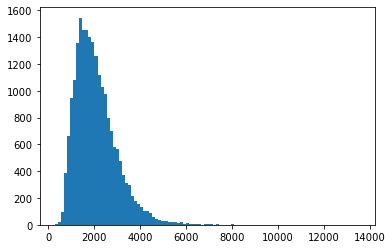

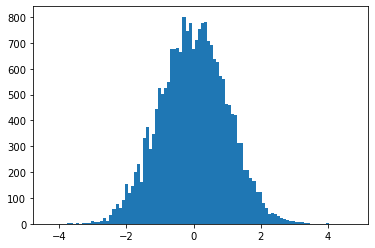

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

train_x = pd.read_csv('kagglebook/kc_house_data.csv')
transformed_train_x = pd.read_csv('kagglebook/kc_house_data.csv')

num_cols = ["sqft_living"]
pos_cols = ["sqft_living"]

from sklearn.preprocessing import PowerTransformer

# 学習データに基づいて複数列のBox-Cox変換を定義
pt = PowerTransformer(method='box-cox')
pt.fit(train_x[pos_cols])

# 変換後のデータで各列を置換
transformed_train_x[pos_cols] = pt.transform(train_x[pos_cols])

plt.hist(train_x["sqft_living"], bins=100)
plt.show()

plt.hist(transformed_train_x["sqft_living"], bins=100)
plt.show()

## genenralized log tranformation
あまり使われていないが、あるにはある。

\begin{align}
 x^{(\lambda)}
 =
 \log \left(x + \sqrt{x^2 + \lambda} \right).
\end{align}

## ほかの非線型変換
データの特性・変数の意味に応じていろいろ考える。

- 絶対値
- 平方根
- 二乗（$n$乗）
- 正負またはゼロかどうかの2値変数に置換
- 数値の端数を取る（100円未満を切り捨てる、小数点以下を切り捨てる）
- 四捨五入・切り捨て・切り上げ

## clipping
- 数値変数は外れ値を持つ（ことがある）
- 上限・下限を設定して外れ値を除外する手法がある
    - 分布から適当に閾値を指定する
    - 分位点を閾値として外れ値を機械的に置換

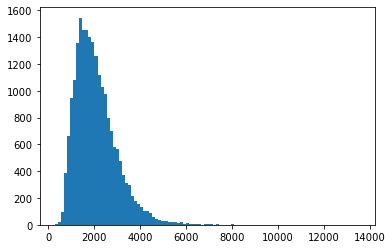

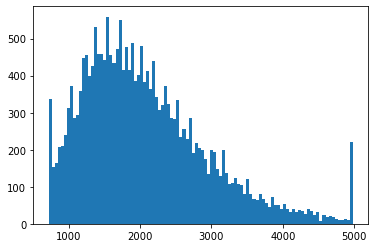

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

train_x = pd.read_csv('kagglebook/kc_house_data.csv')
transformed_train_x = pd.read_csv('kagglebook/kc_house_data.csv')

num_cols = ["sqft_living"]
pos_cols = ["sqft_living"]

# clipping 適用前
plt.hist(train_x["sqft_living"], bins=100)
plt.show()

# 列ごとに学習データの1％点、99％点を計算
p01 = train_x[num_cols].quantile(0.01)
p99 = train_x[num_cols].quantile(0.99)

# 1％点以下の値は1％点に、99％点以上の値は99％点にclippingする
train_x[num_cols] = train_x[num_cols].clip(p01, p99, axis=1)
plt.hist(train_x["sqft_living"], bins=100)
plt.show()

## 3.4.5 binning
- 数値変数を区間ごとにグループ分けしてあえてカテゴリ変数化する処理
- 等間隔に分割、分位点で分割、区間の区切りを指定して分割など
- データに対する前提知識があり、わけるべき区間の見当がついているべき
- binning で順序のあるカテゴリ変数になる
    - 順序をそのまま数値にする
    - カテゴリ変数として one-hot encoding を使う
    - カテゴリ変数特有の処理もできる：区間のカテゴリごとに他の変数の値を集計する
- `pandas` では `cut`、`numpy` では `digitize`。

### 例：食事の金額とクーポン単価
- 同じ食事でも金額の範囲ごとに利用目的が違うことを反映する
- 食事のクーポン単価を 1500円以下・1500-3000円、3000円以上に binning
- 区間ごとに他の変数の値を集計する

## 3.4.6 順位への変換
- 数値変数を大小関係にもとづく順位に変換する
    - 数値の大きさや感覚の情報をあえて捨てて大小関係だけを抽出する
    - 単に順位に変換
    - 順位をレコード数で割って 0-1 の範囲に収める：値のスケールがレコード数に依存しなくなり扱いやすくなる

### 例：店舗の人気度の定量化
- 店舗ごとの来店者数が日ごとに記録されているとする
- 1 週間の来店者実績から店舗の人気度を定量化する
- 休日の来店者が多いと休日の傾向が強く出て**しまう**
- 来店者の少ない平日の傾向も休日と同じ重みで評価**したい**
- 各日の来店者数を順位に変換してから集約する

`RankGauss` は順位の変換からさらに正規分布に変換する手法。

## RankGauss
- 数値変数を順位に変換し、さらに順位を保ったまま正規分布になるように変換する
- ニューラルネットでモデルを作るときの変換として、普通の標準化よりもいい性能を示すらしい：[参考](http://fastml.com/preparing-continuous-features-for-neural-networks-with-rankgauss/)

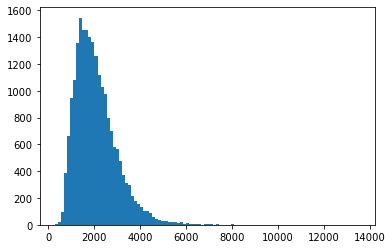

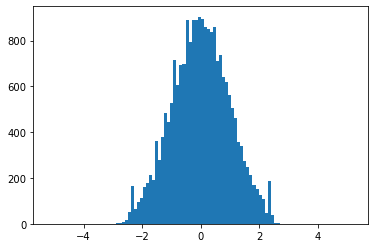

In [14]:
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt
import pandas as pd

train_x = pd.read_csv('kagglebook/kc_house_data.csv')
transformed_train_x = pd.read_csv('kagglebook/kc_house_data.csv')

num_cols = ["sqft_living"]
pos_cols = ["sqft_living"]

# 適用前
plt.hist(train_x["sqft_living"], bins=100)
plt.show()

# 学習データに基づいて複数列のRankGaussによる変換を定義
transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
transformer.fit(train_x[num_cols])

# 変換後のデータで各列を置換
train_x[num_cols] = transformer.transform(train_x[num_cols])

# 適用後
plt.hist(train_x["sqft_living"], bins=100)
plt.show()

## 3.5 カテゴリ変数の変換
### 注意
- データ上数値であっても値の大きさや順序に意味がない場合はカテゴリ変数として扱う必要がある。

### 基本の処理
- ここまでは数値変数の処理
- ここからはカテゴリ変数の処理
- モデルごとに最適な形に変換しなければならない
- テストデータにだけ存在する水準がある場合、カテゴリ変数の変換中にエラーがでたり変換できたとしても、モデルはその水準について学習できない：その水準を含むレコードの予測値がおかしくなる可能性がある。
- カテゴリ変数を変換する前にテストデータにしかないカテゴリがあるかないか確認する。
    - 対応しなくても影響が小さいか
    - 最頻値や予測で補完する：最も頻度が多い水準で補完したり、欠損値とみなして 3.3.3 で紹介した方法で補完する。
    - 変換するときその変換での平均値または適切な値を入れる：target coding なら例えば学習データ全体の目的変数の平均を入れる。

## 変換手法に対する 1 案（AUTHOR'S OPINION）
- GBDT などの決定木ベースのモデルでは label encoding （後述）でカテゴリ変数を変換するのが簡単
- しかし target encoding の方がいい場合も多い：ただしリークの危険性もあり上級者向きの処理
- その他のモデルでは one-hot encoding がオーソドックス
- ニューラルネットでは embedding layer を変数ごとに作るのが手間だが embedding も有効

## 図 3.9：one-hot encoding の例
### 変換前
| 変換前 |
|--------|
| A1     |
| A2     |
| A3     |
| B1     |
| B2     |
| A1     |
| A2     |
| A1     |

### 変換後
| A1 | A2 | A3 | B1 | B2 |
|:----:|:----:|:----:|:----:|:----:|
|  1 |  0 |  0 |  0 |  0 |
|  0 |  1 |  0 |  0 |  0 |
|  0 |  0 |  1 |  0 |  0 |
|  0 |  0 |  0 |  1 |  0 |
|  0 |  0 |  0 |  0 |  1 |
|  1 |  0 |  0 |  0 |  0 |
|  0 |  1 |  0 |  0 |  0 |
|  1 |  0 |  0 |  0 |  0 |

## 3.5.1 one-hot encoding
- カテゴリ変数に対する代表的なハンドリング法
- 各水準に対してその水準かどうかを 0-1 の二値変数を作る：上の図 3.9 参照
- これらの二値変数はダミー変数と呼ばれる
- pandas の get_dummies 関数か scikit-learn の preprocessing モジュールの `OneHotEncodr` で one-hot encoding できる
- カテゴリ変数の水準が $n$ 個あるときダミー変数を水準の数だけ作ると多重共線性が起きる（後述）ので、防ぐために $n-1$ 個のダミー変数を作る手法がある
    - コンペでは多重共線性が問題にならないことも多い
    - 気にせず $n$ 個のダミー変数を作ってしまうのがふつう

### 多重共線性
- [参考](https://axa.biopapyrus.jp/machine-learning/preprocessing/categorical-data.html)

> カテゴリが 4 つあるとき、4 つのダミー変数を用意する必要はない。例えば、sunny、cloudy および rainy に対応するダミー変数を用意して、この 3 つのダミー変数がすべて 0 のときは自動的に snowy を意味するようになる。このような置換手法を dummy encoding という。one-hot encoding に比べ、この dummy encoding の方が多重共線性を回避することができる。

### 重大な欠点
- 特徴量の数がカテゴリ変数の水準数に応じて増える：学習の計算時間・メモリ消費量が増え、モデルの性能が落ちる
- カテゴリ変数が多すぎる場合は次のように対処する
    - one-hot encoding 以外の encoding 手法を使う
    - 何らかのルールでグルーピングして、カテゴリ変数の水準を減らす
    - 頻度の少ないカテゴリをすべて「その他」にまとめる

## 3.5.2 label encoding
- scikit-learn 由来の命名のようで、label encoding という名前は Python コミュニティの外で通じないかもしれない
    - ordinal encoding と呼ばれることもある
- 各水準を単純に整数に置換
- GBDT では基本的な手法
- ふつう水準を文字列として辞書式に並べた順序のインデックスで置換：次のセルが例
- 決定木ベースの手法以外ではふつう不適切
- scikit-learn の LabelEncoder で対応可能

### label encoding の例
| 変換前 | 変換後 |
|:--------|:--------|
| A1     |      0 |
| A2     |      1 |
| A3     |      2 |
| B1     |      3 |
| B2     |      4 |
| A1     |      0 |
| A2     |      1 |
| A1     |      0 |

## 3.5.3 feature hashing
- feature hashing では変換後の特徴量数をカテゴリの水準数より少なくする
    - カテゴリの水準数が多く、one-hot encoding では生成される特徴量が多すぎる場合につかう
    - 分析コンペだとあまり使わない：水準数が多くても label encoding -> GBDT 学習である程度対応できる
    - cf: one-hot encoding での変換後の特徴量数はカテゴリの水準数と同じ
- 変換後の特徴量数を最初に決めておき、ハッシュ関数を使って水準ごとにフラグを立てる場所を決める
- scikit-learn.feature_extraction の FeatureHasher
    - 変換後の特徴量は疎行列で返る

## 3.5.4 frequency encoding
- 各水準の出現回数・出現頻度でカテゴリ変数を置き換える
    - これらに関連がある場合は役に立つ
- label encoding の変形としても使える

### 注意
- 学習データとテストデータで別々に集計すると両者が違う意味の変数になってしまって意味がなくなる
- 数値変数のスケーリングと同じ

## 3.5.5 target encoding
よくわからん

- 目的変数を使ってカテゴリ変数を数値に変換する
- カテゴリ変数の各水準での目的変数の平均値を学習データで集計し、その値で置換

### 注意
- 時系列性が強いデータではカテゴリの出現頻度が時間変化しうるため、カテゴリごとの値集計で時間変化を反映できないことがある
- 目的変数をリークさせる可能性がある
    - 単純にデータ全体から平均を取ると自身のレコードの目的変数をカテゴリ変数に取り込んでしまい、リークする

### 手法・実装
- 学習データを target encoding 用の fold に分割
- 自身の目的変数の値を含めずに変換したい：各 fold ごとに自身の fold 以外のデータで計算する out-of-fold の方法で目的変数の平均値を計算
- target encoding の fold 数は 4-10 程度

### 手法・実装：クロスバリデーションする場合
クロスバリデーションは 5.2.2 で議論。

- クロスバリデーションごとに変換をかけ直す必要がある
- バリデーションデータの目的変数を変数に含めてはいけない：変換をかけ直す必要がある
- 各 fold ではバリデーションデータを除いた学習データについては target encoding 用の fold に分割し、図 3.14 のように変換する
    - クロスバリデーションの fold 数だけくり返す

### INFORMATION
- クロスバリデーションの fold と target encoding の fold の分割を合わせて変換を 1 回で済ませる方法もある

### 目的変数の平均の取り方
- タスクに応じて次のように平均を取る
    - 回帰：目的変数の平均
    - 二値分類：正例は 1、負例は 0 として平均（正例の出現頻度を取ることになる）
    - 多クラス分類：クラス数だけ二値分類があるとみなし、クラスの数だけ target encoding による特徴量を作る
- 平均より中央値を取るべき場合、対数平均を取るべき場合など適宜工夫する

### target encoding とリーク：全体データから平均を取る場合
- 例：ある水準にあるレコードが 1 つしかない場合、その水準の target encoding の結果は目的変数の値そのものになってしまう。
    - 極端な場合：各レコードでユニークな ID の列に対して適用した場合。
    - 変換の結果は目的変数の列に完全一致する。
- レコード数が少ない水準がある場合は似た問題が起きる：リーク・過学習につながる

### target encoding とリーク：leave-one-out での問題
- fold 数を多くしすぎても問題が起きる：直観的にはイメージしづらい
- 二値分類でカテゴリ変数を leave-one-out （5.2.5 で議論）で target encoding する場合
    - 自身の目的変数で変換結果が明確にわかれる。
    - 自身のレコードだけを集計に含めないせいで、逆に自身の目的変数を強く反映する

### ほかの工夫
- リークを防ぐために変換値にノイズをのせる
- データ数が少ない水準が極端な値を取らないようにデータ全体の平均と重みづけする

## 3.5.6 embedding
- 自然言語処理での単語やカテゴリ変数の離散的な表現をベクトルに変換する方法
- 分散表現ともいう
- 自然言語処理では単語数が大量：単語の特徴をモデルにどう反映させるか？
- 意味・性質がよく表現されたベクトルに変換したい

### 自然言語処理での word embedding
- 単語について学習済みの embedding がいくつか公開されている
- Word2Vec, GloVe, tastText...

### embedding による学習
- ニューラルネットでは embedding layer という層がある：単語やカテゴリ変数をベクトルに変換
- 学習後にこの層のウェイト（各カテゴリ変数の変換法）を取り出せば、モデルが学習したカテゴリ変数の各水準が持つ意味・性質を抽出可能
- embedding layer のウェイトは外からも設定できる：ある程度単語の意味を理解した状態でモデルの学習が始まる

## 3.5.7 順序変数の扱い
- 値の順序に意味はあるが間隔には意味がない変数
- 決定木系モデル：序列をそのまま整数にして数値変数化
- その他：数値変数でも、カテゴリ変数としてみてもいい

## 3.5.8 カテゴリ変数の値の意味を抽出する
- 型番などが典型的
- 単純な encoding では意味が消える
- 意味を抽出する処理をかけておく
    - ABC-00123, XYZ-00200 のような型番：前半の英字 3 文字と後半の数字 5 文字に分割
    - 英数交じりの文字列：数字か否かを特徴量化
    - 文字数に違いがある：文字数を特徴量化

## 3.6 日付・時刻を表す変数の変換

## 3.6.1 日付・時刻を表す変数の変換のポイント
- 年月日への分解
- 曜日を変数に追加

### 学習データとテストデータの分割
- 学習データとテストデータが同じ期間なら問題はない
- これらの期間が分かれている場合は注意がいる
- 例：2017 年までが学習データ、2018 年からがテストデータ
    - 年を特徴量にすると、予測は外挿になって手法によっては精度が出ない
- 対応策
    - 年の情報を含めずにモデルを作る
    - テストデータにしかない年を学習データにある最新の年に置換：将来の目的変数の傾向が最直近の年の傾向と近いと仮定
- 年の情報の使い方
    - 過去 10 年分使えるとしても、3 年分しか使わないなど
    - 古すぎるデータは逆にノイズになりうる
- 時期データの難しさの例：冬に売り上げが落ちていて施策を打ってよくなったとき、それ以前のデータから学んだ月の特徴量は将来の予測で冬に売り上げが落ちる予測を導いてしまう

### 周期的な動きをとらえるための十分なデータがあるか
- 月を特徴量にする：年の中での月単位での周期的な変動をとらえようとしている
- 学習データが 2 年未満：ある月で目的変数の傾向に動きがあっても、月の影響か別要因かはデータから判断できない
- いろいろ考える必要がある
    - 目的変数は月よりも気温に相関する
    - データが不足してもあえて月を特徴量に含める
    - 月を特徴量から排除する
- より細かい日・時は十分な周期数があるため特徴量として使いやすい

### 周期性を持つ変数の扱い
- 月をそのまま数値として扱うと、1 月と 12 月は本来隣り合うのに数値的には最も遠い：手法によっては傾向がうまくとらえられない
- 線型モデルの時の難しさ：目的変数が 6-7 月にピークを迎える左右対称な傾向を持つと、月の回帰係数が 0 に近くなってしまう
- one-hot encoding を使う手もある：月同士の近さの概念はなくなる
- target encoding：目的変数の値に相関するように月を並び替える扱い

## 3.6.2 日付・時刻を表す変数変換による特徴量
### 年
- データの分割のされ方・性質に強く依存する
- 年の特徴量を単純に追加
- 年の特徴量を加えるが、テストデータにだけ存在する年を学習データの最新の年に置換する
- 年を特徴量に含めない
- 年や月の情報を使って学習データとして使う期間を制限する

### 月
- 1 年の間の季節性をとらえる
- 2 年未満しかない場合は注意
- 境目を季節変動の小さい月にシフトさせたり、one-hot encoding や target encoding したり

### 日
- 月の中で周期的な傾向があるときにそれを捕まられる
- 1-31 まで連続的に変化するとは限らない
- 月初・月末・給料日などの特定の日に特徴が表れるケースがある
- one-hot encoding だと変数の数が増えすぎるので、「特徴のありそうな日かどうか」という二値変数を作るのも一手
- 月末までの駆け込み需要をみたい、など

### 年月・月日など
- 時間的な情報を細かくとらえたり、丸めて過学習をおさえたり
- 学習データとテストデータの期間が重なっていない時の効果は限定的

### 曜日・祝日・休日
- データが人の行動に関連しているとき、曜日に傾向が出ることがある
- 土日か否か、祝日か否か、休日か否か
- 翌日・翌々日が休日か、前日・前々日が休日か
- 連休の何日目か

### 特別な日
- 正月、クリスマス、日本ならゴールデンウィークやその前後
- ブラックフライデーやスーパーボウルなど年によって日付が変わることもある

### 時・分・秒
- 時
    - 1 日の中での周期的な動きを反映できる
    - 数時間単位で丸めたり、特定の時間帯かどうかの二値変数を作ったり
- 分・秒
    - よほど特別なデータでない限り、これだけを特徴量にしても意味がないことが多い

### 時間差
- 予測データとある時点での時間差を特徴量とする方法がある
- 住宅価格の予測タスク：築年数が重要
- 株価：前回の配当があってから何日経ったか、配当の権利確定日まであと何日か

## 3.7 変数の組み合わせ
- 複数の変数を組み合わせて変数同士の相互作用を表現する
- 特徴量の重要度については 6.2.2 で説明

### 数値変数×カテゴリ変数
- 水準ごとに数値変数の平均・分散などの統計量を取る

### 数値変数×数値変数
- 数値変数の加減乗除やあまり、2 つの変数が同じかどうか

### INFORMATION
- GBDT は加減よりも乗除の関係性をとらえるのが難しい
- 加減よりも乗除の特徴量を追加した方がモデルが反映できていない部分を補完しやすい

### カテゴリ変数×カテゴリ変数
- 注意：水準数が非常に多いカテゴリ変数になりうる
- 操作：文字列として変数同士を連結し、3.5 で述べたカテゴリ変数を変換する

### AUTHOR'S OPINION
- カテゴリ変数同士の組み合わせで作った変数の変換は target encoding が有効：細分化されるため
- 細分化されるほど平均を計算する母集団が減り、過学習のリスクは高まる

### 行の統計量を取る
- レコードごとに複数の変数を対象にする
- 欠損値・ゼロ・負の値の数をカウントしたり、平均・分散・最大・最小などの統計量を計算する